In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import set_config
set_config(display='diagram') # to visualize pipeline
pd.set_option('max_colwidth', 1000)

Columns Meaning
Country: Country \
Year: Year \
Status: Country Developed or Developing status \
Life expectancy: Life expectancy in age \ 
Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) \
infant deaths: Number of Infant Deaths per 1000 population \ 
Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%) \ 
Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%) \
Measles: Measles - number of reported cases per 1000 population \
BMI: Average Body Mass Index of entire population \
under-five deaths: Number of under-five deaths per 1000 population \
Polio: Polio (Pol3) immunization coverage among 1-year-olds (%) \
Total expenditure: General government expenditure on health as a percentage of total government expenditure (%) \
Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) \
HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years) \
GDP: Gross Domestic Product per capita (in USD) \
Population: Population of the country \
thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%) \
thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%) \ 
Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1) \
Schooling: Number of years of Schooling(years) 

In [4]:
df = pd.read_csv("Life_Expectancy Data.csv")

In [7]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [33]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [34]:
def convertStatus(status):
    status_col = status.copy()
    status_col[status == "Developing"] = 0
    status_col[status != "Developing"] = 1
    return status_col

df["Status"] = convertStatus(df['Status'])

In [35]:
X = df.drop(columns = ["Country","Year","Life expectancy "])
y = df['Life expectancy ']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [46]:
n_estimators = [50, 100, 150, 200]
max_features = [7, 10, 15, 19]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'mae', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit (X_train,y_train)    
            y_model = rf.predict(X_train)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X_train, y_train, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

Number of Estimators: 100
Max features: 15
Max Depth: 7
Min Split: 4
Min Leaf: 3
Best Mean Absolute Error: 2.146


In [56]:
clf = RandomForestRegressor(
                     n_estimators = max_n, 
                    criterion = 'mae', 
                     max_features= max_f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = max_d, min_samples_split = max_s, 
                     min_samples_leaf = max_l)
clf.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=7, max_features=15,
                      min_samples_leaf=3, min_samples_split=4, random_state=33)

fdsaj 
fdsa fdsa \newline


In [61]:
feature_imp = pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp

 HIV/AIDS                          0.379045
Adult Mortality                    0.280811
Income composition of resources    0.209347
Schooling                          0.030993
 thinness 5-9 years                0.016351
 BMI                               0.015994
 thinness  1-19 years              0.014912
Alcohol                            0.014475
under-five deaths                  0.007168
Polio                              0.005503
infant deaths                      0.004973
Hepatitis B                        0.003862
Diphtheria                         0.003785
GDP                                0.003218
Total expenditure                  0.003123
percentage expenditure             0.002480
Measles                            0.002233
Population                         0.001727
Status                             0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


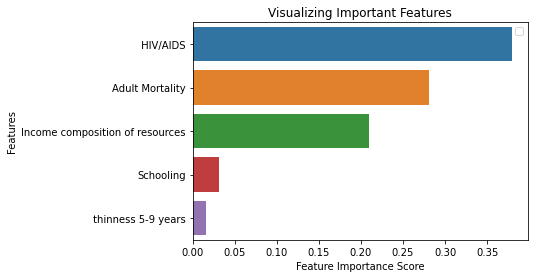

In [64]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:5], y=feature_imp[:5].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()